<a href="https://colab.research.google.com/github/youngmook/cheminfo-python/blob/main/cheminfo_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RDKit (Cheminformatics tool) 설치

In [ ]:
!pip install rdkit-pypi

## RDKit 불러오기


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

## MDL Mol 파일을 읽고 쓰기를 해보자

벤젠 분자를 만들어 보자 (SMILES 코드를 이용하자)

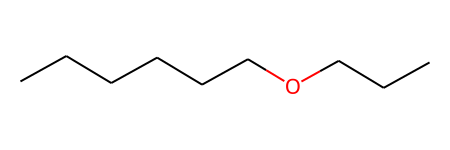

In [ ]:
theMol = Chem.MolFromSmiles('CCCCCCOCCC')
theMol

MDL Molfile 문자열 만들기

In [ ]:
theMolBlock = Chem.MolToMolBlock(theMol)
print(theMolBlock)


     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7942   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.0933    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3923   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.6913    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



분자 이름 변경하기

In [ ]:
theMol.SetProp('_Name','1-Propoxyhexane')
print(Chem.MolToMolBlock(theMol))

1-Propoxyhexane
     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4952    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7942   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.0933    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.3923   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.6913    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



분자를 MDL Mol파일로 저장하기


In [ ]:
theMolName = '1-Propoxyhexane.mol'
print(Chem.MolToMolBlock(theMol),file=open(theMolName, 'w+'))

MDL Mol 파일 불러오기

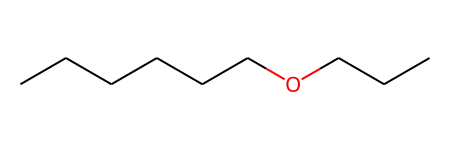

In [ ]:
theAnotherMol = Chem.MolFromMolFile(theMolName)
theAnotherMol

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄

In [ ]:
theInvalidMolecule1 = Chem.MolFromSmiles('CO(C)C')
theInvalidMolecule1 is None

True

잘못된 분자구조를 읽어오려고 하면, 오류 메세지와 함께 Mol 객체는 None을 나타냄 (Kekulize 오류)

In [ ]:
theInvalidMolecule1 = Chem.MolFromSmiles('c1cc1')
theInvalidMolecule1 is None

True

## RDKit Mol 객체 다루기!!!
분자의 원자 개수 확인

In [ ]:
theNumOfAtoms = theMol.GetNumAtoms()
theNumOfAtoms

10

분자의 Bond 개수 확인

In [ ]:
theNumOfBonds = theMol.GetNumBonds()
theNumOfBonds

9

분자에 H원자 붙이기

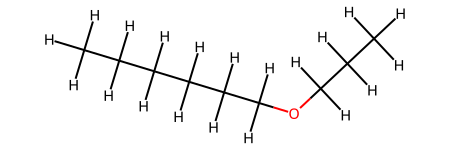

In [79]:
theMolWithHAtoms = Chem.AddHs(theMol)
theMolWithHAtoms

분자구조의 위치를 3차원 좌표값으로 만들기

1-Propoxyhexane
     RDKit          3D

 30 29  0  0  0  0  0  0  0  0999 V2000
   -3.1752   -0.3521   -0.9019 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0014    0.5961   -0.7718 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8532    1.1214    0.6339 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6259    0.0662    1.6521 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3783   -0.7551    1.4723 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8677    0.0808    1.5365 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0479   -0.5813    1.4069 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.2095   -1.2312    0.2022 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1868   -0.2702   -0.9549 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3406    0.7178   -0.7490 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8786   -1.4082   -0.6821 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0024   -0.0970   -0.2137 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5486   -0.2689   -1.9443 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1104

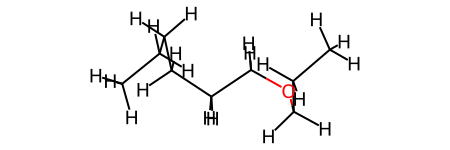

In [80]:
AllChem.EmbedMolecule(theMolWithHAtoms)  
print(Chem.MolToMolBlock(theMolWithHAtoms))
theMolWithHAtoms

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

def show3DMol(theMol, style='stick'):
    mblock = Chem.MolToMolBlock(theMol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()

def show3DMolWithOptimization(theMol, style='stick'):
    mol = Chem.AddHs(theMol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=400, height=400)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
    


In [ ]:
show3DMol(theMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
show3DMolWithOptimization(theMolWithHAtoms)  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

분자구조를 2차원으로 만들기

1-Propoxyhexane
     RDKit          2D

 30 29  0  0  0  0  0  0  0  0999 V2000
   -6.0666    0.8406    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6309    0.4061    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1952   -0.0283    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7595   -0.4628    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3238   -0.8973    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1119   -1.3318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5476   -1.7663    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6417   -0.7402    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7358    0.2860    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8300    1.3121    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5023    1.2751    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6321    2.2763    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -6.5011   -0.5951    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0654

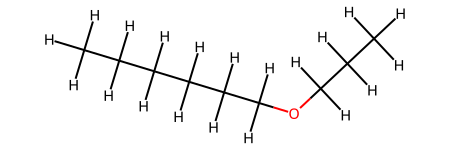

In [ ]:
AllChem.Compute2DCoords(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMolWithHAtoms))
theMolWithHAtoms

H원자 지우기

1-Propoxyhexane
     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
   -6.0666    0.8406    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6309    0.4061    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1952   -0.0283    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7595   -0.4628    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3238   -0.8973    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1119   -1.3318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5476   -1.7663    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6417   -0.7402    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7358    0.2860    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8300    1.3121    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  1  0
  9 10  1  0
M  END



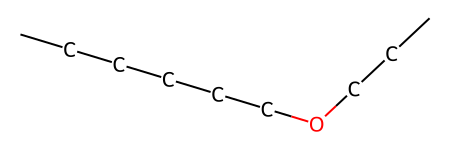

In [ ]:
theMol2 = Chem.RemoveHs(theMolWithHAtoms)
print(Chem.MolToMolBlock(theMol2))
theMol2

## Atom과 Bond 다루기

개별 Atom 객체 가져오기

In [ ]:
theFirstAtomOfMol = theMol.GetAtomWithIdx(0)
theFirstAtomOfMol

In [ ]:
theFirstAtomOfMol.GetAtomicNum()

6

In [ ]:
theFirstAtomOfMol.GetMass()

12.011

In [ ]:
theFirstAtomOfMol.GetSymbol()

'C'

In [ ]:
theNeighbors = theFirstAtomOfMol.GetNeighbors()
theNeighbors

(<rdkit.Chem.rdchem.Atom at 0x7faf13a0a3a0>,
 <rdkit.Chem.rdchem.Atom at 0x7faf13a0a530>)

원자번호 및 원소기호 출력

In [ ]:
#GetAtoms()

for index, ithAtom in enumerate(theMolWithHAtoms.GetAtoms()):
  print(str(index+1).zfill(2), '원자번호: {0}, 원소기호: {1}'.format(ithAtom.GetAtomicNum(), ithAtom.GetSymbol()))


01 원자번호: 6, 원소기호: C
02 원자번호: 6, 원소기호: C
03 원자번호: 6, 원소기호: C
04 원자번호: 6, 원소기호: C
05 원자번호: 6, 원소기호: C
06 원자번호: 6, 원소기호: C
07 원자번호: 1, 원소기호: H
08 원자번호: 1, 원소기호: H
09 원자번호: 1, 원소기호: H
10 원자번호: 1, 원소기호: H
11 원자번호: 1, 원소기호: H
12 원자번호: 1, 원소기호: H


개별 Bond 객체 가져오기

In [ ]:
theFirstBond = theMol.GetBondWithIdx(0)
theFirstBond

In [ ]:
theFirstBond.GetBeginAtomIdx()

0

In [ ]:
theFirstBond.GetEndAtomIdx()

1

In [ ]:
theFirstBond.GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

Bond 정보 출력

In [ ]:
#GetBonds()

for index, ithBond in enumerate(theMolWithHAtoms.GetBonds()):
  print(str(index+1).zfill(2), '\t시작: {0}, 끝: {1}, Type: {2}'.format( 
      str(ithBond.GetBeginAtomIdx()).zfill(2), 
      str(ithBond.GetEndAtomIdx()).zfill(2), 
      ithBond.GetBondType()))


01 	시작: 00, 끝: 01, Type: AROMATIC
02 	시작: 01, 끝: 02, Type: AROMATIC
03 	시작: 02, 끝: 03, Type: AROMATIC
04 	시작: 03, 끝: 04, Type: AROMATIC
05 	시작: 04, 끝: 05, Type: AROMATIC
06 	시작: 05, 끝: 00, Type: AROMATIC
07 	시작: 00, 끝: 06, Type: SINGLE
08 	시작: 01, 끝: 07, Type: SINGLE
09 	시작: 02, 끝: 08, Type: SINGLE
10 	시작: 03, 끝: 09, Type: SINGLE
11 	시작: 04, 끝: 10, Type: SINGLE
12 	시작: 05, 끝: 11, Type: SINGLE


## SMILES 코드 다루기
*   Chiral 표현




     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  1
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



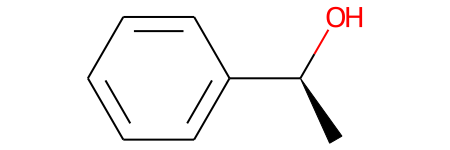

In [ ]:
theChiralMol = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
print(Chem.MolToMolBlock(theChiralMol))
theChiralMol

In [ ]:
show3DMol(theChiralMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
show3DMolWithOptimization(theChiralMol)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Chiral 제거


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END

CC(O)c1ccccc1


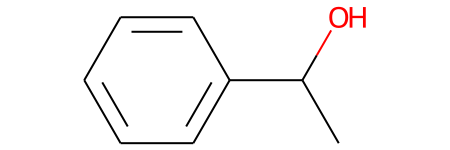

In [ ]:
theRemovedChiralMolSmiles = Chem.MolToSmiles(theChiralMol,isomericSmiles=False)
theRemovedChiralMol = Chem.MolFromSmiles(theRemovedChiralMolSmiles)
print(Chem.MolToMolBlock(theRemovedChiralMol))
print(theRemovedChiralMolSmiles)
theRemovedChiralMol

* 기본 SMILES코드는 Canonical SMILES를 제공함

c1ccncc1


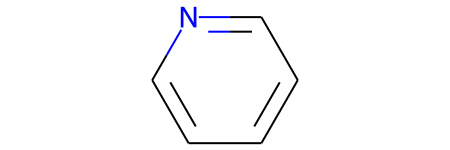

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
Chem.MolFromSmiles('C1=CC=CN=C1')

c1ccncc1


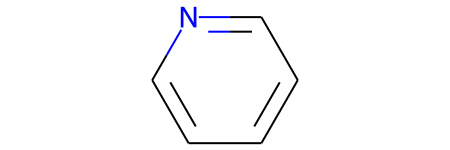

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
Chem.MolFromSmiles('c1cccnc1')

c1ccncc1


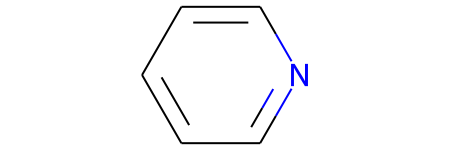

In [ ]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))
Chem.MolFromSmiles('n1ccccc1')

## MDL SDF 파일 읽기 (Reading sets of molecules)

MDL SD 파일은 "Mol 파일 묶음 + 분자 속성"을 가진 파일입니다.

In [82]:
theSDMolSupplier = Chem.SDMolSupplier('in-stock+for-sale.sdf')

theZincMolList = []

for ithMol in theSDMolSupplier :
  theZincMolList.append(ithMol)
  pass

theZincMolList[0:10]

In [ ]:
print(theZincMolList[0].GetProp("zinc_id"))

ZINC000000035284


In [ ]:
print(Chem.MolToMolBlock(theZincMolList[0]))


     RDKit          3D

 25 28  0  0  0  0  0  0  0  0999 V2000
   -1.9187   -1.7530    0.7656 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5058   -0.7929    0.2316 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9590   -0.8400    0.1022 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7112    0.2651   -0.1854 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0778    0.2194   -0.3091 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7477   -0.9842   -0.1404 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0009   -2.1023    0.1500 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6121   -2.0397    0.2720 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8376    0.3831   -0.2808 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3843    1.6333   -0.3153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7124    2.7450   -0.8045 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4384    2.5527   -1.2690 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1658    1.3305   -1.2621 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5292    0.2366   -0

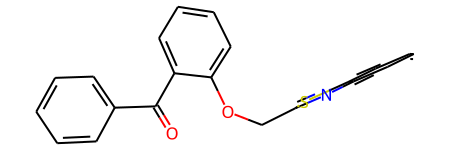

In [ ]:
theZincMolList[0]

In [ ]:
show3DMol(theZincMolList[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
show3DMolWithOptimization(theZincMolList[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## 분자 그림 파일 만들기

In [ ]:
from rdkit.Chem import Draw


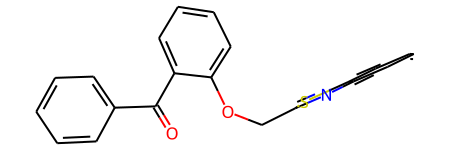

In [ ]:
Draw.MolToFile(theZincMolList[0], 'zinc-001.png')
theZincMolList[0]

2D 구조 최적화 후 그림 저장

In [ ]:
import copy
theFirstZincMol = copy.deepcopy(theZincMolList[0])
AllChem.Compute2DCoords(theFirstZincMol)


0

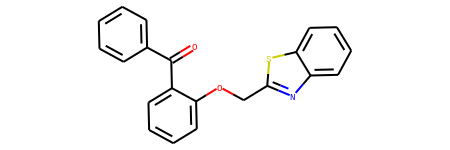

In [ ]:
Draw.MolToFile(theFirstZincMol, 'zinc-001-2D.png')
theFirstZincMol

여러 분자를 Grid 형태로 저장



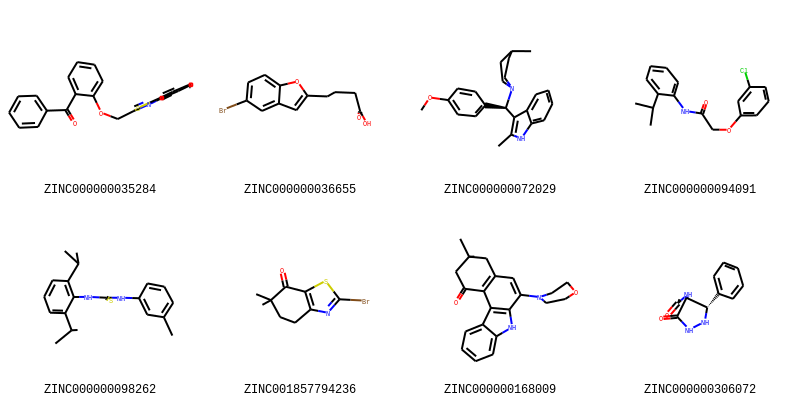

In [ ]:
theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]])    
theGridImage.save('zinc-grid-001-008.png')
theGridImage

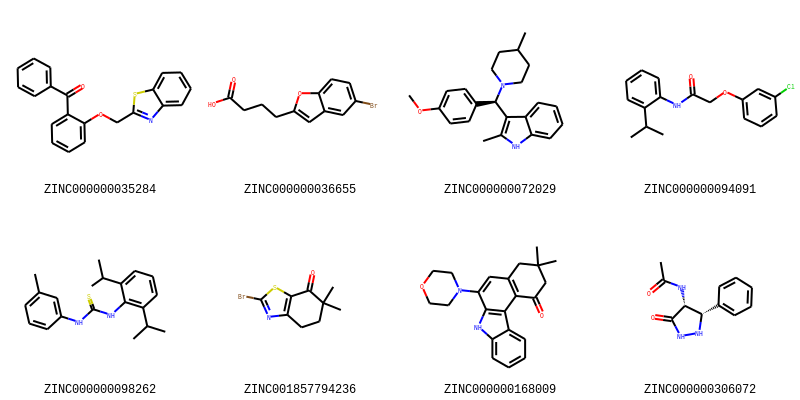

In [ ]:
for ithMol in theZincMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theZincMolList[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theZincMolList[:8]])    
theGridImage.save('zinc-grid-001-008-2D.png')
theGridImage

Sub structure를 가진 화합물 찾아 그림으로 저장

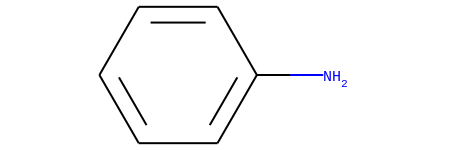

In [ ]:
theCommonCoreMol = Chem.MolFromSmiles('Nc1ccccc1')
theCommonCoreMol

In [ ]:
#theSubZincMolList = [x for x in theZincMolList if x.HasSubstructMatch(theCommonCoreMol)]

theSubMatchedMolList = []
for ithMol in theZincMolList:
  if (ithMol.HasSubstructMatch(theCommonCoreMol)):
    theSubMatchedMolList.append(ithMol)
    pass
  pass

print('# of total molecule list : ' + str(len(theZincMolList)))
print('# of matched molecules : ' + str(len(theSubMatchedMolList)))


# of total molecule list : 100
# of matched molecules : 48


In [ ]:
AllChem.Compute2DCoords(theCommonCoreMol)

for ithMatchedMol in theSubMatchedMolList:
  _ = AllChem.GenerateDepictionMatching2DStructure(ithMatchedMol,theCommonCoreMol)    

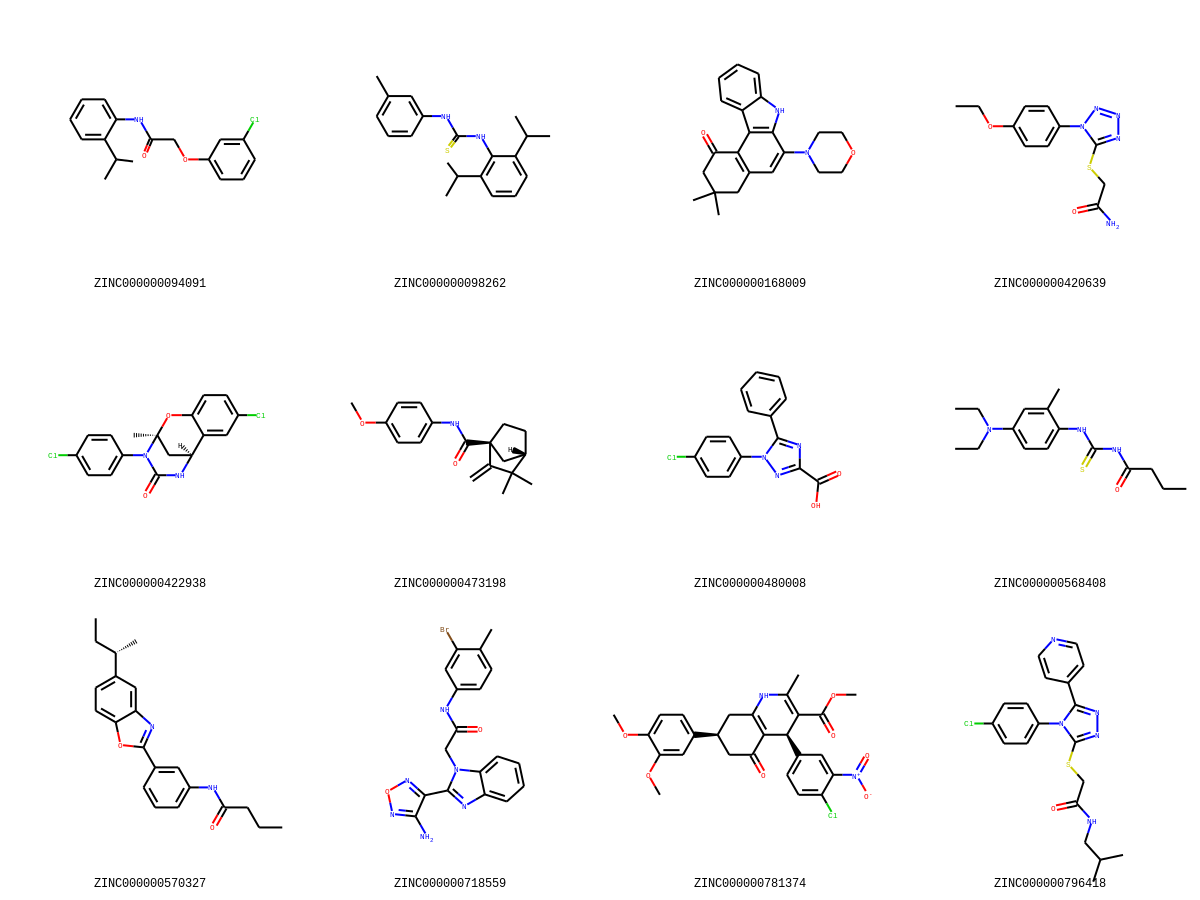

In [ ]:
theMatchedGridImage = Draw.MolsToGridImage(theSubMatchedMolList[:12],molsPerRow=4,subImgSize=(300,300),legends=[x.GetProp("zinc_id") for x in theSubMatchedMolList])    
theMatchedGridImage.save('zinc-matched-grid.png') 
theMatchedGridImage

## Substructure 검색

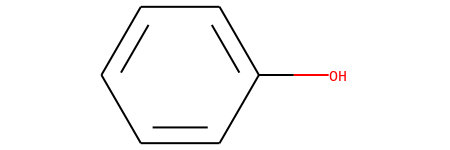

In [ ]:
theMolecule = Chem.MolFromSmiles('c1ccccc1O')
theMolecule



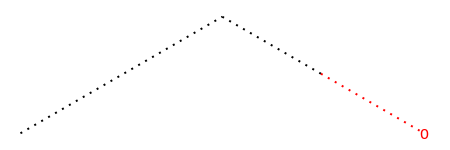

In [ ]:
thePattern = Chem.MolFromSmarts('ccO')
thePattern

In [ ]:
theMolecule.HasSubstructMatch(thePattern)

True

In [ ]:
theMolecule.GetSubstructMatch(thePattern)

(0, 5, 6)

In [ ]:
theMolecule.GetSubstructMatches(thePattern)

((0, 5, 6), (4, 5, 6))

In [ ]:
theMatchedMolList = []
for ithZincMol in theZincMolList:
  if ithZincMol.HasSubstructMatch(thePattern):
    theMatchedMolList.append(ithZincMol)

print(len(theMatchedMolList))

41


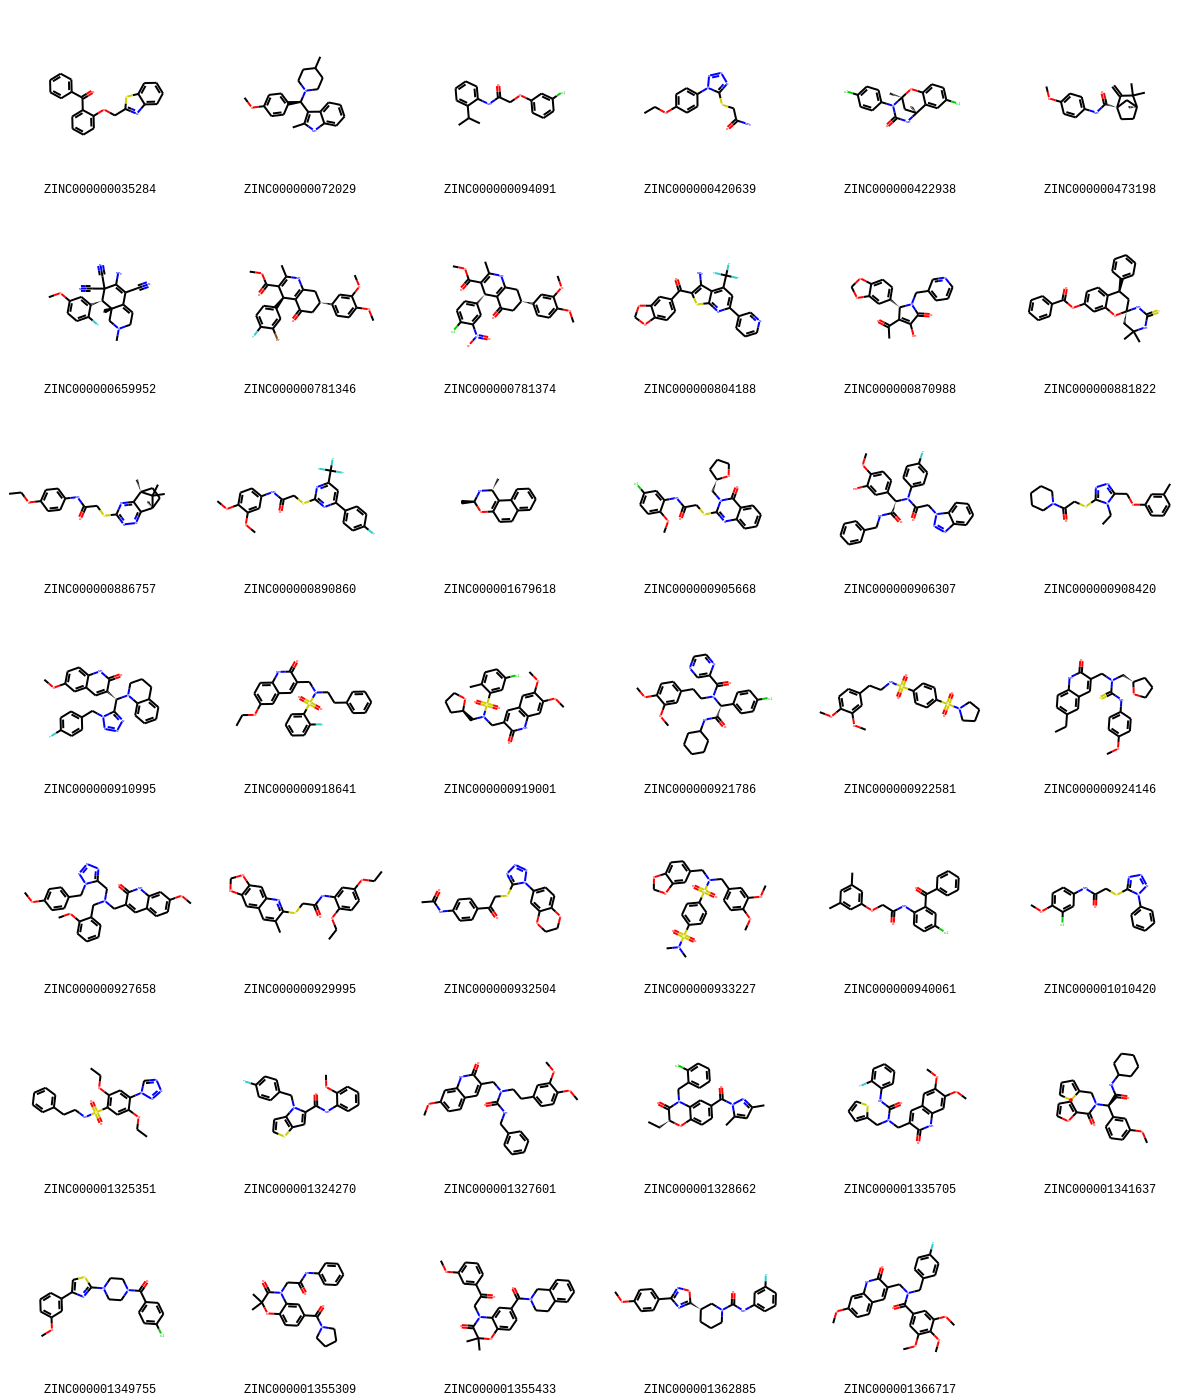

In [ ]:
for ithMol in theMatchedMolList:
  AllChem.Compute2DCoords(ithMol)
  pass

theGridImage = Draw.MolsToGridImage(theMatchedMolList,molsPerRow=6,subImgSize=(200,200),legends=[x.GetProp("zinc_id") for x in theMatchedMolList])    
theGridImage.save('zinc-substr-matched-grid-2D.png')
theGridImage

## Chemical Transformations

Substructure-based Transformations

* Deleting substructure

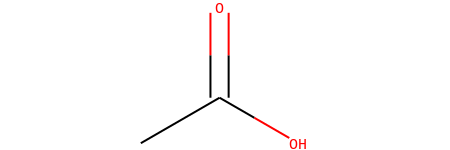

In [ ]:
theMol = Chem.MolFromSmiles('CC(=O)O')
theMol

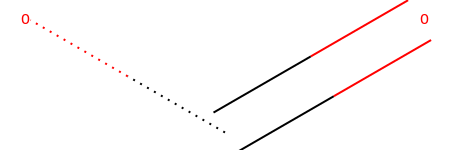

In [ ]:
thePattern = Chem.MolFromSmarts('C(=O)[OH]')
thePattern

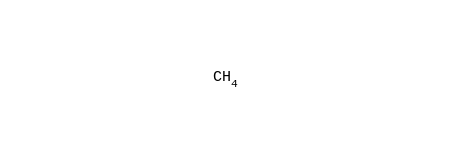

In [ ]:
theRemovedMol = AllChem.DeleteSubstructs(theMol,thePattern)
theRemovedMol

* Replacing substructure

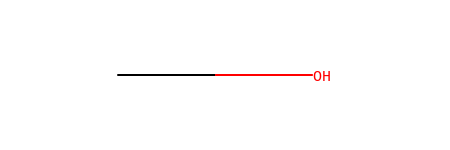

In [ ]:
theReplaceMol = Chem.MolFromSmiles('OC')
theReplaceMol

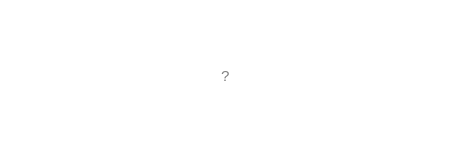

In [ ]:
thePattern = Chem.MolFromSmarts('[$(NC(=O))]')
thePattern

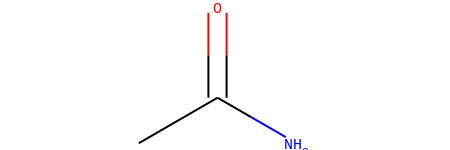

In [ ]:
theMol = Chem.MolFromSmiles('CC(=O)N')
theMol

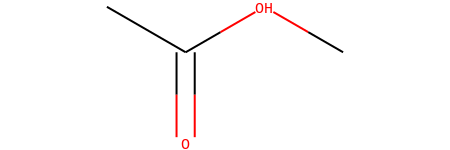

In [ ]:
AllChem.ReplaceSubstructs(theMol,thePattern,theReplaceMol)[0]


## Fingerprinting and Molecular Similarity


In [89]:
from rdkit import DataStructs

첫번째 분자와 나머지 분자의 유사도 계산

In [ ]:
theFingerprintList = [Chem.RDKFingerprint(x) for x in theZincMolList]
for idx, ithFingerprint in enumerate(theFingerprintList):
  if idx == 0 : continue
  ithSimilarity = DataStructs.FingerprintSimilarity(theFingerprintList[0], theFingerprintList[idx])
  print(idx, ithSimilarity)

Fingerprint 이미지 만들기

In [94]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]

((6, 2),)

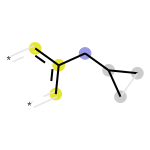

In [97]:
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
mfp2_svg

In [98]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]

[[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]

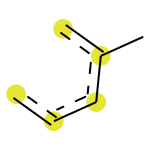

In [99]:
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
rdk_svg

In [100]:
theSDMolSupplier = Chem.SDMolSupplier('logS-data.sdf')

theMolList = []

for ithMol in theSDMolSupplier :
  theMolList.append(ithMol)
  pass

theMolList[0:10]

In [101]:
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Dense,
    Dropout,
)


In [102]:
def molToFingerprintList(mol):
  return np.append(Fingerprinter.FingerprintMol(mol)[0],Descriptors.MolWt(mol))

In [103]:
X = []
y = []
for ithMol in theMolList:
  X.append(molToFingerprintList(ithMol))
  y.append(float(ithMol.GetProp('logS')))
X = np.array(X)
y = np.array(y)
X

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 665.733],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 589.64 ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 528.582],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 206.266],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 218.321],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   , 141.086]])

In [105]:
theStandardScaler = StandardScaler()
X= theStandardScaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.99449515],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.36520251],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.08054434],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.86357368],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.62097486],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.04418619]])

In [117]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1, activation='linear'))

In [118]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               41472     
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               262400    
                                                                 
 dense_13 (Dense)            (None, 1024)              263168    
                                                                 
 dense_14 (Dense)            (None, 512)              

In [119]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True))


In [120]:
#history = model.fit(X_train, y_train, nb_epoch=500, batch_size=32)
history = model.fit(
    X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test)
)

Epoch 1/50
33/33 [==============================] - 2s 38ms/step - loss: 5.4294 - val_loss: 2.0722
Epoch 2/50
33/33 [==============================] - 1s 34ms/step - loss: 1.4571 - val_loss: 1.1229
Epoch 3/50
33/33 [==============================] - 1s 33ms/step - loss: 0.8912 - val_loss: 0.8992
Epoch 4/50
33/33 [==============================] - 1s 33ms/step - loss: 0.7147 - val_loss: 0.8077
Epoch 5/50
33/33 [==============================] - 1s 33ms/step - loss: 0.5974 - val_loss: 0.6990
Epoch 6/50
33/33 [==============================] - 1s 31ms/step - loss: 0.5115 - val_loss: 0.6570
Epoch 7/50
33/33 [==============================] - 1s 33ms/step - loss: 0.4552 - val_loss: 0.5921
Epoch 8/50
33/33 [==============================] - 1s 32ms/step - loss: 0.4138 - val_loss: 0.5807
Epoch 9/50
33/33 [==============================] - 1s 33ms/step - loss: 0.3850 - val_loss: 0.5432
Epoch 10/50
33/33 [==============================] - 1s 32ms/step - loss: 0.3420 - val_loss: 0.5615
Epoch 11/

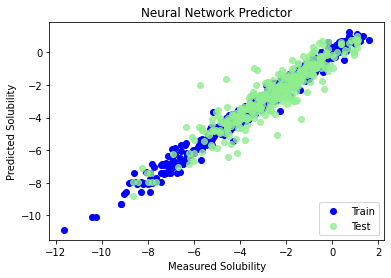

In [121]:
import matplotlib.pyplot as plt

plt.scatter(y_train,model.predict(X_train), label = 'Train', c='blue')
plt.title('Neural Network Predictor')
plt.xlabel('Measured Solubility')
plt.ylabel('Predicted Solubility')
plt.scatter(y_test,model.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
plt.show()